In [106]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

In [138]:
with open('get_darknet_maps.sh','w') as f:
    for train_val in ['train','val']:
        for weights in range(100,15000,100):
            f.write('./darknet detector map /home/rob/HWR/darknet/word_%s.data /home/rob/HWR/darknet/cfg/word-yolov3-tiny.cfg aarandzoo/word-yolov3-tiny_%s.weights > maps/%s_%s.txt\n'%(train_val,weights,train_val,weights))

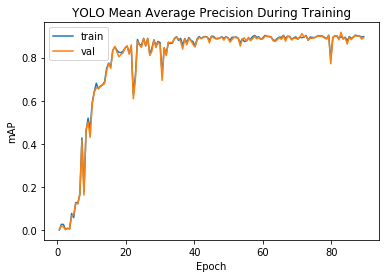

In [150]:

fps = glob('/home/rob/HWR/darknet/maps/*.txt')
data = []
for fp in fps:
    dataset = fp.split('/')[-1].split('_')[0]
    weights = int(fp.split(dataset + '_')[1].split('.txt')[0])
    with open(fp,'r') as f:
        for line in f.readlines():
            if 'mean average precision' in line:
                _map = float('0.' + re.findall('[0-9]+',line)[1])
                data += [[dataset, weights, _map]]
                
data = pd.DataFrame(data,columns=['dataset','weight','mAP']).sort_values(['dataset','weight'])
data['weight'] = data['weight']*24/4000
plt.figure()
plt.title('YOLO Mean Average Precision During Training')
plt.ylabel('mAP')
plt.xlabel('Epoch')
for dataset in data['dataset'].drop_duplicates().values:
    plt.plot(data[(data['dataset']==dataset)&(data['weight'] < 20000)]['weight'],data[(data['dataset']==dataset)&(data['weight'] < 20000)]['mAP'],label=dataset)

plt.legend()

In [153]:
data[data['weight']>=34]

,dataset,weight,mAP
163,train,34.2,0.889108
203,train,34.8,0.897015
47,train,35.4,0.879939
228,train,36.0,0.889715
26,train,36.6,0.857471
221,train,37.2,0.888982
98,train,37.8,0.869529
105,train,38.4,0.892954
15,train,39.0,0.880384
162,train,39.6,0.874577


In [ ]:
#7600 seems good.

In [139]:
fps = glob('/home/rob/HWR/datasets/Aarhus/*-lab.jpg')
fps += glob('/home/rob/HWR/datasets/zooniverse/*/Cropped*.jpg')
np.random.seed(42)
fps = np.random.permutation(fps)
#60,20,20
#train = fps[:int(len(fps)*0.7)]
#val = fps[int(len(fps)*0.7):]
#test = fps[int(len(fps)*0.8):]
np.savetxt('cropped_to_predict_on.txt',fps,fmt='%s',delimiter='\n')